Loss of train: [169.5798737528647, 119.34293199802529, 87.655998622263468, 67.666557541989135, 55.053464209110139, 47.091839278112644, 42.063396757694882, 38.884600924691121, 36.872184638968477, 35.595286853212649, 34.782211607641294, 34.26163096067944, 33.925508025186858, 33.705716547170496, 33.559297422252016, 33.459161598021097, 33.38822742283795, 33.335723726766766, 33.294858593021473, 33.26134932003631, 33.232495440770904, 33.206594187186667, 33.182571895867881, 33.159751582686084, 33.137706383153287, 33.116167137826807, 33.094964120204253, 33.073990293833617, 33.053178144959368, 33.032485075298915, 33.011884192374062, 32.991358503182781, 32.970897253739373, 32.950493621582552, 32.930143261295413, 32.909843387802923, 32.889592198686437, 32.869388510201688, 32.849231527992941, 32.829120702696066, 32.809055639032032, 32.789036038600614, 32.769061663899542, 32.749132315709481, 32.729247818891025, 32.709408013475134, 32.689612749080474, 32.669861881422321, 32.650155270133176, 32.63049

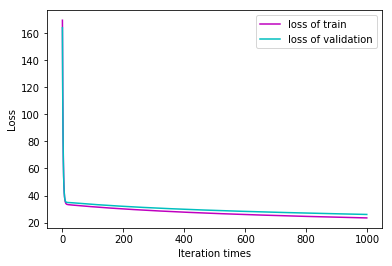

In [25]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

eta = 0.001 # Learning Rate
iter = 1000 # Iteration times
accuracy = 0.001 # If loss<accuracy , then stop iteration

m = 506 # Amount of data
m_train = 203 # Amount of training data
m_test = 203 # Amount of testing data
features=13 # Fearures of dataset

#Initialize arrays
theta=[0]*(features+1) #All zero initialization
#used to stastic and draw graph
iter_num = [0]*iter;
loss_train  =[0]*iter;
loss_test  = [0]*iter;


#Use to get dataset from file
def get_data():
    data = load_svmlight_file("dataset\\housing_scale",n_features=features)
    return data[0], data[1]

#Use to split dataset and return 
def split_data():
    X, y = get_data()
    X = X.toarray()
    return train_test_split( X, y, test_size=0.5, random_state=43)

#The linear model
def hypothesis(x):
    result = theta[0]
    for i in range (0,features):
        result = result + theta[i+1] * x[i]
    return result

#Loss function 
def loss(m,X,y):
    sum=0
    for i in range(0,m):
        sum = sum + ( hypothesis(X[i]) - y[i] ) **2
    sum = sum / (2*m)
    return sum

#Derivative the Loss function to get Gradient of  theta j
def derivative(j,m,X,y):
    sum=0
    if(j==0):
         for i in range(0,m):
            sum = sum + ( hypothesis(X[i]) - y[i] ) 
    else:
        for i in range(0,m):
            sum = sum + ( hypothesis(X[i]) - y[i] ) *  X[i][j-1]
        sum = sum / m        
    return sum

#Train and validate 
def trainAndTest():
    for i in range(0,iter):
        for j in range(0,features+1):
            #Using gradient descent to minimum the Loss Function, eta is the step length
            #Derivative(j) calculates the gradient on theta j
            theta[j] = theta[j] - eta * derivative(j,m_train,X_train,y_train)
            
        iter_num[i] = i;
        loss_train[i] = loss(m_train,X_train,y_train);
        loss_test[i] = loss(m_test,X_test,y_test);
        
            
def information():
    print("Loss of train:", loss_train)
    print("Loss of valitation",loss_test)


#Main 
X_train, X_test, y_train, y_test = split_data()

trainAndTest()

#Print the information and draw graphs
information()
fig, ax = plt.subplots()
ax.plot(iter_num, loss_train,color = 'm', label='loss of train')
ax.plot(iter_num, loss_test, color = 'c', label='loss of validation')
plt.legend(bbox_to_anchor=[1, 1])  
ax.set_xlabel('Iteration times')
ax.set_ylabel('Loss')
plt.show()
